# РК ИУ5-61Б 

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<AxesSubplot:>

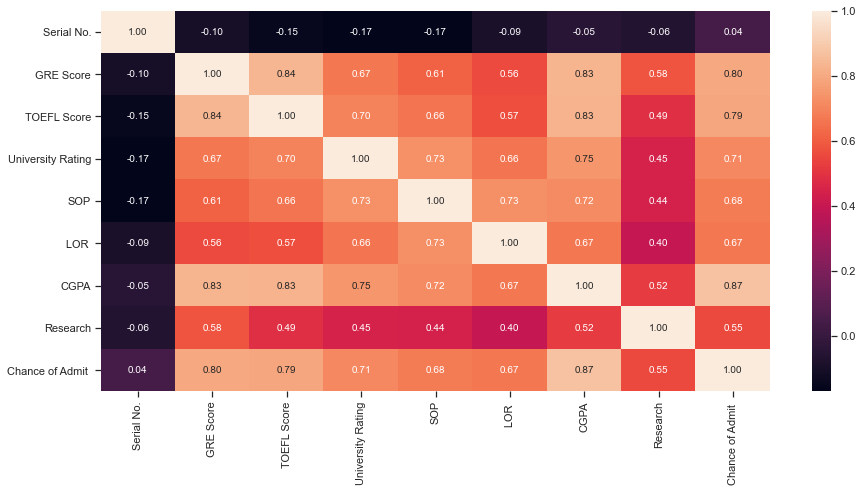

In [8]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [9]:
X = data.drop(['GRE Score'], axis = 1)
Y = data['GRE Score']
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Serial No.  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0           1          118                  4  4.5   4.5  9.65         1   
1           2          107                  4  4.0   4.5  8.87         1   
2           3          104                  3  3.0   3.5  8.00         1   
3           4          110                  3  3.5   2.5  8.67         1   
4           5          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65   

Выходные данные:

 0    337
1    324
2    316
3    322
4    314
Name: GRE Score, dtype: int64


In [10]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      Serial No.  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
100         101          107                  3  3.5   3.5  8.46         1   
322         323          107                  2  2.5   4.0  8.27         0   
6             7          109                  3  3.0   4.0  8.20         1   
1             2          107                  4  4.0   4.5  8.87         1   
297         298          120                  3  4.0   4.5  9.11         0   

     Chance of Admit   
100              0.71  
322              0.72  
6                0.75  
1                0.76  
297              0.86   

Входные параметры тестовой выборки:

      Serial No.  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
132         133          105                  5  3.5   3.5  8.56         0   
309         310          110                  4  3.5   3.0  8.60         0   
341         342          110                  3  3.5   3.5  8.76         1

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [12]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

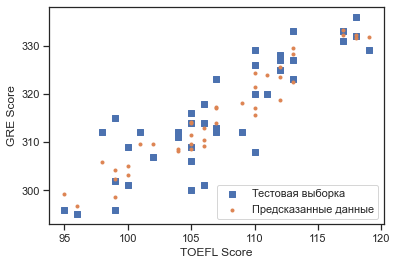

In [13]:
plt.scatter(X_test['TOEFL Score'], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test['TOEFL Score'], lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('TOEFL Score')
plt.ylabel ('GRE Score')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [16]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 2.7050000000000027
Средняя квадратичная ошибка: 12.943000000000021
Median absolute error: 2.1999999999999886
Коэффициент детерминации: 0.8986010938594041


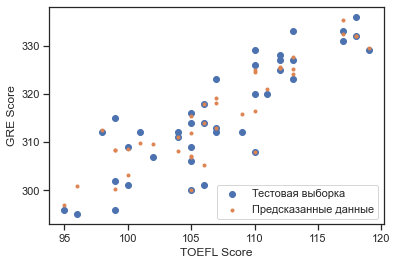

In [17]:
plt.scatter(X_test['TOEFL Score'], Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test['TOEFL Score'], Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('TOEFL Score')
plt.ylabel('GRE Score')
plt.show()